<a href="https://colab.research.google.com/github/ceciliasilvads/previsao_ataque_cardiaco_kaggle/blob/main/chances_ataque_cardiaco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cuidados de saúde: possibilidade de ataque cardíaco**
![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.D3egHsbv7BywfW-1zAXA-AHaDe%26pid%3DApi&f=1)


## **Objetivos**

- Fazer uma EDA análise exploratória dos dados
- Solução de machine learning para previsão de chances de ataque cardíaco em indivíduos.


## **Sobre os dados**

Este conjunto de dados contém 76 atributos, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles. Em particular, o banco de dados de Cleveland é o único que tem sido usado por pesquisadores de ML para
esta data. 

O campo "target" refere-se à presença de doença cardíaca no paciente. É um número inteiro com valor 0 = nenhuma / menos chance de ataque cardíaco e 1 = mais chance de ataque cardíaco.

### **Fonte:** https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

# **Importações iniciais**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

sns.set()

# **Carregamento e exploração dos dados**

In [ ]:
data_heart = pd.read_csv('https://raw.githubusercontent.com/cecellhax/previsao_ataque_cardiaco_kaggle/main/heart.csv')

In [ ]:
data_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data_heart.duplicated().sum()

1

In [ ]:
data_heart.drop_duplicates(inplace=True)

In [ ]:
data_heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


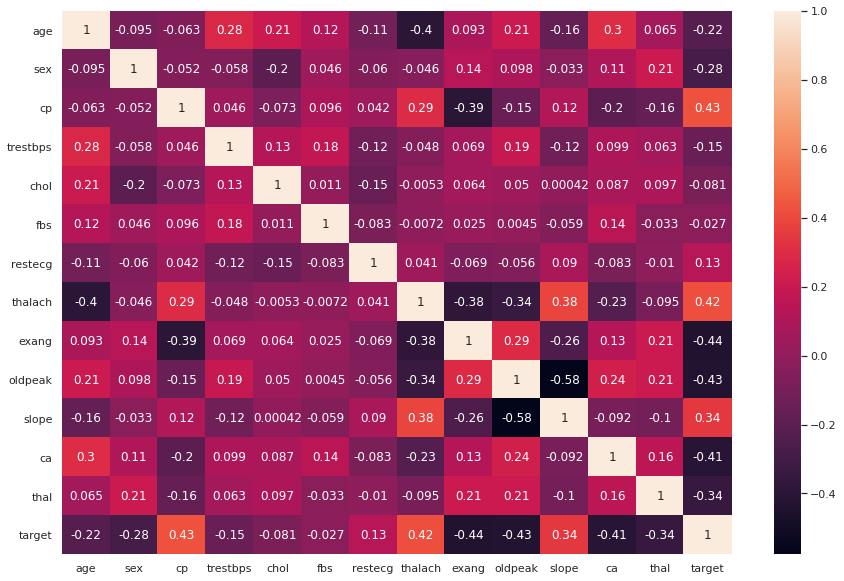

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_heart.corr(), annot=True)
plt.show()

# **Visualização do dados**

# **age - Idade dos pacientes**

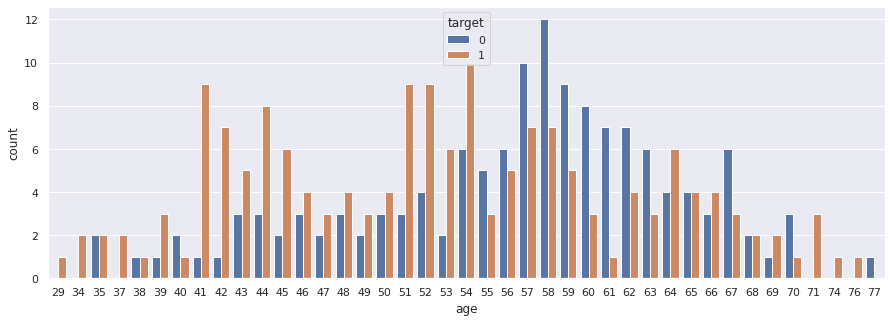

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=data_heart['age'], hue=data_heart['target'])
plt.show()

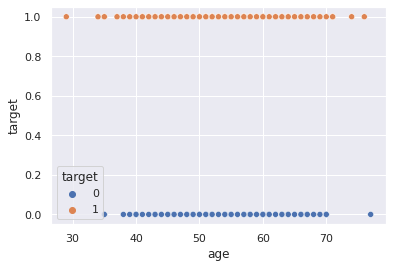

In [ ]:
sns.scatterplot(x=data_heart['age'], y=data_heart['target'], hue=data_heart['target'])
plt.show()

# **sex - Sexo dos pacientes** 
- 1 = male/masculino
- 0 = female/feminino

In [ ]:
data_heart['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

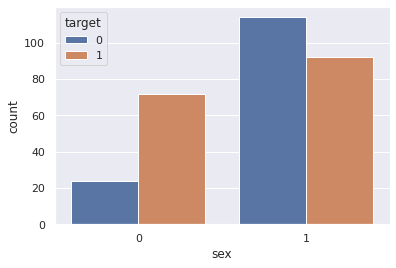

In [ ]:
sns.countplot(x=data_heart['sex'], hue='target', data=data_heart)
plt.show()

# **cp - Tipos de dores no peito**

- 0 = angina típica
- 1 = angina atípica
- 2 = dor não anginosa
- 3 = assintomático

**Obs:** 
A angina é tipicamente uma dor na região central ou à esquerda do tórax, que pode irradiar para as costas, mandíbula ou para o braço esquerdo. A dor costuma ser descrita como um aperto ou uma sensação de pressão no peito e é tipicamente desencadeada por esforço ou emoção.

In [ ]:
data_heart['cp'].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

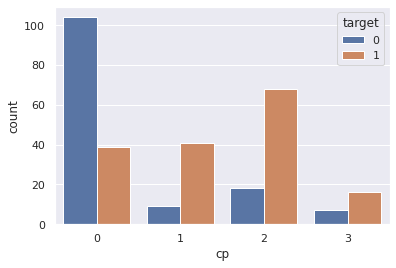

In [ ]:
sns.countplot(x=data_heart['cp'], hue='target', data=data_heart)
plt.show()

# **trestbps - Pressão arterial em repouso em mm Hg**

In [ ]:
data_trestbps = data_heart['trestbps'].value_counts()
data_trestbps

120    37
130    36
140    32
110    19
150    17
138    12
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: trestbps, dtype: int64

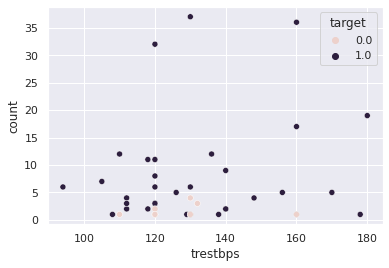

In [ ]:
sns.scatterplot(x='trestbps', y=data_trestbps, hue='target', data=data_heart)
plt.ylabel('count')
plt.show()

# **chol - Colesterol sérico em mg/dl**


In [ ]:
data_heart['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

In [ ]:
data_chol = data_heart['chol'].value_counts()
data_chol

234    6
204    6
197    6
212    5
254    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

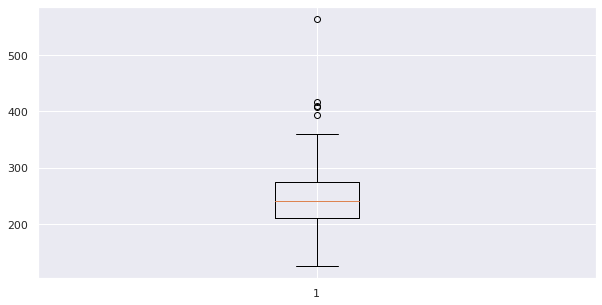

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(data_heart['chol'])
plt.show()

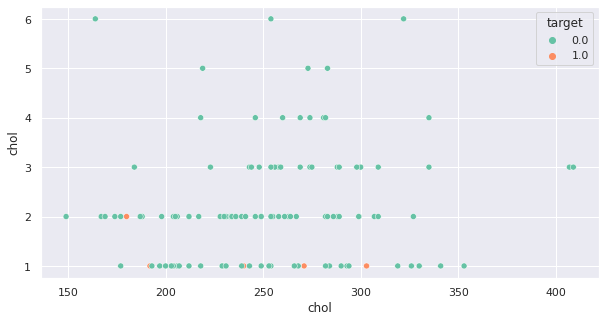

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='chol', y=data_chol, hue='target', data=data_heart, palette='Set2')
plt.show()

# **fbs - Açúcar no sangue em jejum > 120 mg/dl**
- 1 = Verdadeiro
- 0 = Falso

In [ ]:
data_fbs = data_heart['fbs'].value_counts()
data_fbs

0    257
1     45
Name: fbs, dtype: int64

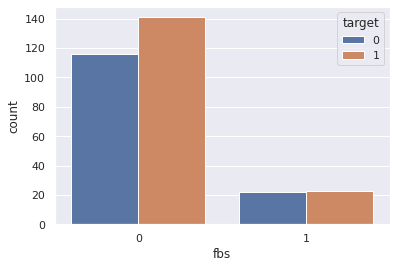

In [ ]:
sns.countplot(x='fbs', hue='target', data=data_heart)
plt.show()

# **restecg - Resultados eletrocardiográficos em repouso (0, 1 e 2)**

- 0 = Normal
- 1 = Tendo anormalidade da onda ST-T (inversões da onda T e / ou elevação ou depressão do ST> 0,05 mV)
- 2 = Mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes

In [ ]:
data_restecg = data_heart['restecg'].value_counts()
data_restecg

1    151
0    147
2      4
Name: restecg, dtype: int64

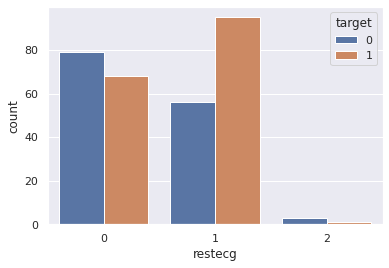

In [ ]:
sns.countplot(x='restecg', hue='target', data=data_heart)
plt.show()

# **tahlach - Frequência cardíaca máxima alcançada**

In [ ]:
data_heart['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

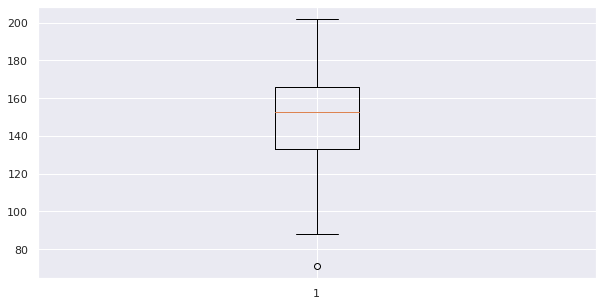

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(data_heart['thalach'])
plt.show()

# **exang - Angina induzida por exercício**
- 1 = sim
- 0 = não

In [ ]:
data_exang = data_heart['exang'].value_counts()
data_exang

0    203
1     99
Name: exang, dtype: int64

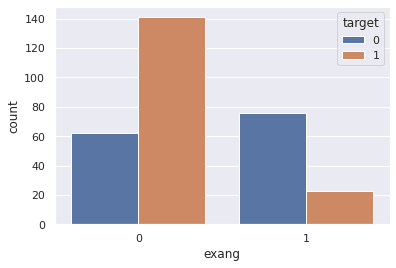

In [ ]:
sns.countplot(x='exang', hue='target', data=data_heart)
plt.show()

# **oldpeak - Depressão de ST induzida por exercício em relação ao repouso**

In [ ]:
data_oldpeak = data_heart['oldpeak'].value_counts()
data_oldpeak

0.0    98
1.2    17
0.6    14
1.0    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
1.5     5
0.5     5
3.0     5
2.2     4
3.6     4
2.4     3
3.4     3
4.0     3
0.9     3
0.3     3
2.3     2
4.2     2
1.1     2
2.5     2
3.2     2
6.2     1
2.1     1
4.4     1
1.3     1
3.1     1
0.7     1
5.6     1
3.8     1
2.9     1
3.5     1
Name: oldpeak, dtype: int64

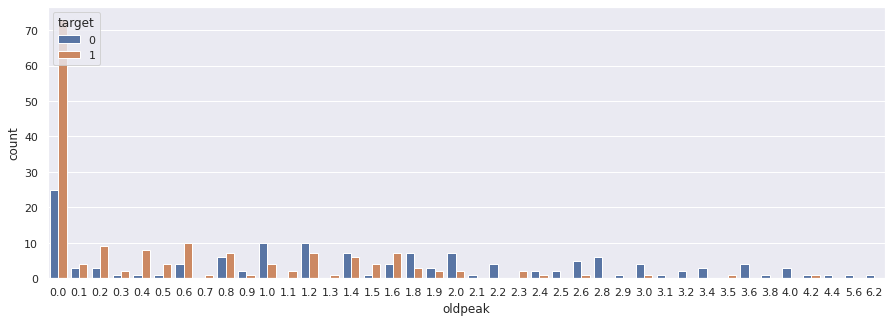

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=data_heart['oldpeak'], hue=data_heart['target'])
plt.show()

# **slope - A inclinação do segmento ST de pico do exercício**

- 0 = hipertrofia
- 1 = normal
- 2 = apresentando anormalidade da onda ST-T

**Obs:**
O segmento ST corresponde ao intervalo entre o fim da despolarização e o início da repolarização ventricular.

In [ ]:
data_heart['slope'].value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

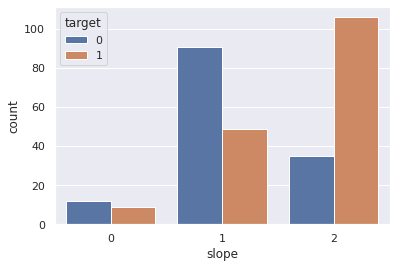

In [ ]:
sns.countplot(x='slope', hue='target', data=data_heart)
plt.show()

# **ca - Número de vasos principais coloridos por fluorosopia**

**Obs:**

A fluoroscopia (ou radioscopia) é um exame que fornece imagens em movimento e em tempo real do interior do corpo, a partir da emissão de raios X. 

In [ ]:
data_heart['ca'].value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

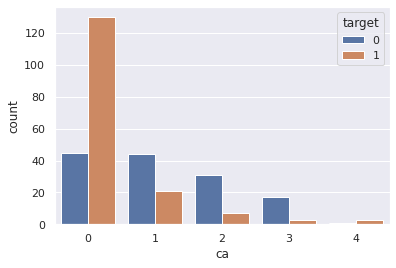

In [ ]:
sns.countplot(x='ca', hue='target', data=data_heart)
plt.show()

# **thal**
- 1 = defeito corrigido
- 2 = normal
- 3 = defeito reversível

In [ ]:
data_heart['thal'].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

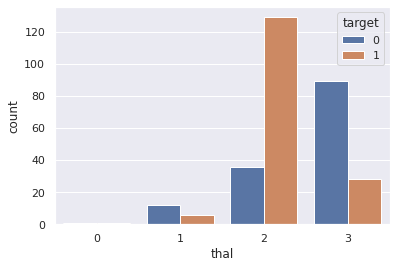

In [ ]:
sns.countplot(x='thal', hue='target', data=data_heart)
plt.show()

# **Preparação dos dados**

- Determinar variaveis independestes(X) e  variaveis dependentes(y);
- Dividir os dados de treino(70%) e teste(30%).

## **Variável independente e variável dependente**

In [ ]:
X = data_heart.iloc[:, 0:-1]
y = data_heart['target']

## **Treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# **Modelagem: Regrassão logística**

In [ ]:
modelo = LogisticRegression(max_iter=1000)

In [ ]:
modelo.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Resultados do treino do modelo**

In [ ]:
pred_train = modelo.predict(X_train)
pred_train

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [ ]:
print('A eficácia do modelo no treino foi de : {:.2f}%'.format(modelo.score(X_train,y_train)*100))

A eficácia do modelo no treino foi de : 87.20%


# **Resultados de teste do modelo**

In [ ]:
pred_test = modelo.predict(X_test)
pred_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0])

In [ ]:
print('A eficácia do modelo no teste foi de : {:.2f}%'.format(modelo.score(X_test,y_test)*100))

A eficácia do modelo no teste foi de : 81.32%


# **Avaliação de perfomance do modelo**

### **Matriz de confusão**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    cm=confusion_matrix(y_true, y_pred)
    tn, fn, fp, tp = cm.ravel()

    cm = [[tp, fp], [fn, tn]]
    sns.heatmap(cm, annot=True, fmt='d');
    plt.xlabel('Predição', fontsize=16)
    plt.ylabel('Target', fontsize=16)

    plt.show()

Precisão no conjunto de treinamento: 0.87
Revocação no conjunto de treinamento: 0.91
Média f1 no conjunto de treinamento: 0.89


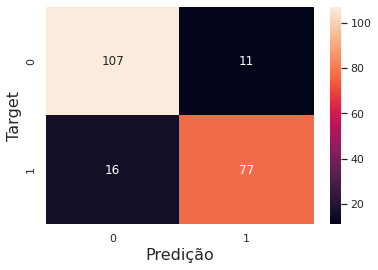

In [ ]:
print('Precisão no conjunto de treinamento: {:.2f}'.format(accuracy_score(y_train, pred_train)))
print('Revocação no conjunto de treinamento: {:.2f}'.format(recall_score(y_train, pred_train)))
print('Média f1 no conjunto de treinamento: {:.2f}'.format(f1_score(y_train, pred_train)))
plot_confusion_matrix(y_train, pred_train)

Precisão no conjunto de teste: 0.81
Revocação no conjunto de teste: 0.89
Média f1 no conjunto de treinamento: 0.83


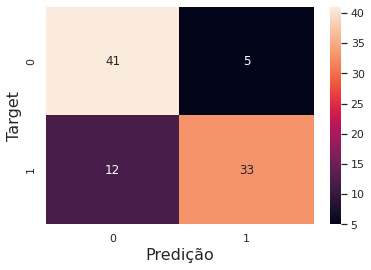

In [ ]:
print('Precisão no conjunto de teste: {:.2f}'.format(accuracy_score(y_test, pred_test)))
print('Revocação no conjunto de teste: {:.2f}'.format(recall_score(y_test, pred_test)))
print('Média f1 no conjunto de treinamento: {:.2f}'.format(f1_score(y_test, pred_test)))
plot_confusion_matrix(y_test, pred_test)